<a href="https://colab.research.google.com/github/liv0018/test/blob/main/Copy_of_Optimization_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras as keras
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D,Activation,BatchNormalization, Input
import tensorflow as tf
from matplotlib.patches import Ellipse
import math
import scipy


In [ ]:
%matplotlib inline

In [ ]:
# hi this is test
dim=6 #Number of rotators
freq_min=2000 #Starting Frequency
freq_max=7000 #Final frequency
freq_step=100 #Frequency step
freq_points=(freq_max-freq_min)//freq_step+1
freq=np.linspace(freq_min, freq_max, freq_points) #list of frequencies

In [ ]:
#FORWARD MODEL ONE FREQ
model=tf.keras.Sequential()
model.add(Dense(units=50, input_shape=(dim,)))
model.add(Dense(50, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(20, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(1))
model.add(Activation('linear'))
optimizer=keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

In [ ]:
model.load_weights("/content/drive/MyDrive/Optimization/virtual_oneoutput_4000Hz_v1.h5")


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                350       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 3,941
Trainable params: 3,941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#FORWARD MODEL Spectra
model2=tf.keras.Sequential()
model2.add(Dense(units=50, input_shape=(dim,)))
model2.add(Dense(50, activation="relu", kernel_initializer="he_normal"))
model2.add(Dense(20, activation="relu", kernel_initializer="he_normal"))
model2.add(Dense(freq_points))
model2.add(Activation('linear'))
optimizer2=keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer2, loss='mse')


In [ ]:
model2.load_weights("/content/drive/MyDrive/Optimization/virtual_rangeoutput_v1.h5")

In [ ]:
#Functions to calculate transmission value/spectra for the desired position of the rotators
#with the help of pre-trained NNs
def acoustic1freq(rot, model):
  res=model.predict(rot.reshape(1,-1))
  #res=model.predict(rot)
  res2=res[0][0]
  return res2

def acousticRange(rot, model):
  res=model2.predict(rot.reshape(1,-1))
  res2=res[0]
  return res2


In [ ]:
rot_position=np.array([80,10,150,100,20,50]) #Note that you should use numpy array and not the list
one_val=acoustic1freq(rot_position, model=model)
spectra=acousticRange(rot_position, model=model2)
print (one_val)
print (spectra)
print (freq)

1/1 [==============================] - 0s 67ms/step
-41.11849
[-10.796106  -12.012078  -11.587646  -10.579832   -8.926845   -8.59457
  -9.579542  -10.734338  -12.203661  -14.656226  -18.89404   -23.934118
 -28.391462  -32.297596  -35.51672   -37.910313  -39.689148  -40.956676
 -41.781345  -42.19101   -42.19284   -41.791176  -40.94821   -39.64075
 -37.79973   -35.314594  -31.987896  -27.378222  -20.278088  -12.5715685
 -10.348356  -11.677015  -11.607809  -14.136066  -17.941679  -20.45584
 -21.335205  -20.44674   -17.915833  -13.623911  -10.538169  -11.322546
 -13.644547  -15.98518   -17.65996   -18.17949   -18.138397  -17.403553
 -16.414366  -15.268795  -13.967418 ]
[2000. 2100. 2200. 2300. 2400. 2500. 2600. 2700. 2800. 2900. 3000. 3100.
 3200. 3300. 3400. 3500. 3600. 3700. 3800. 3900. 4000. 4100. 4200. 4300.
 4400. 4500. 4600. 4700. 4800. 4900. 5000. 5100. 5200. 5300. 5400. 5500.
 5600. 5700. 5800. 5900. 6000. 6100. 6200. 6300. 6400. 6500. 6600. 6700.
 6800. 6900. 7000.]


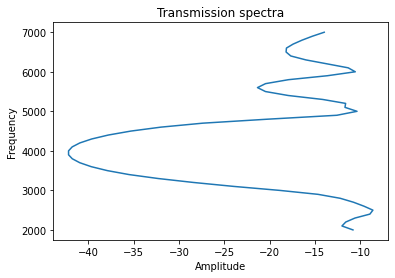

In [ ]:
#Example of drawing
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Amplitude')
ax1.set_ylabel('Frequency')
ax1.set_title('Transmission spectra')
#ax1.set_title('Whole normal dist')
ax1.plot(spectra, freq)

In [ ]:
#Functions to draw the position of rotators
def setupconfig():
  fig_el2 = plt.figure()
  ax1_el2 = fig_el2.add_subplot(211)
  #ax2 = fig.add_subplot(212)
  ax1_el2.set_xlim(0,35)
  ax1_el2.set_ylim(-2.5,2.5)
  ax1_el2.set_aspect('equal')
  #ax2.set_xlim(0,35)
  #ax2.set_ylim(-2.5,2.5)
  #ax2.set_aspect('equal')
  ells2 = [Ellipse(xy=((i+1)*5,0), width=4, height=1, angle=0)
          for i in range(6)]
  for e in ells2:
    ax1_el2.add_artist(e)
  return ells2, fig_el2, ax1_el2

def showconfig(rot,ells2, fig_in, ax_in):
  #fig_out=fig_in
  for i in range(len(ells2)):
    ells2[i].angle=rot[i]
  fig_in.canvas.draw()
  fig_in.canvas.flush_events()
  #display(fig_in)

def showconfigMain(rot):
  ells_in, fig_in, ax_in=setupconfig()
  showconfig(rot,ells_in, fig_in, ax_in)


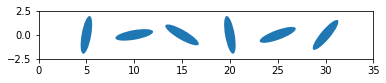

In [ ]:
#Example of position drawing
showconfigMain(rot_position)

In [ ]:
rot_position


array([ 80,  10, 150, 100,  20,  50])

In [ ]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/tst.py')

In [ ]:

import tst
